In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("C:\\Users\\ralna\\OneDrive\\Desktop\\lama-new-dataset"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'heart.csv', 'heartDiseaseAndAges.png', 'heart_mod_test.csv', 'heart_mod_train.csv', 'heart_test.csv', 'heart_train.csv', 'Untitled.ipynb']


In [240]:
# We are reading our data
df = pd.read_csv("C:\\Users\\ralna\\OneDrive\\Desktop\\lama-new-dataset\\heart.csv")

In [241]:
# First 5 rows of our data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data contains;


age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

target - have disease or not (1=yes, 0=no)

Data Exploration

In [242]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [243]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [244]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [245]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


Creating Dummy Variables

Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

In [246]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [247]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [248]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


Normalize Data


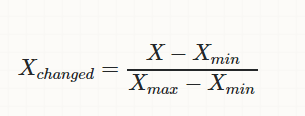

In [249]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [250]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

We will split our data. 80% of our data will be train data and 20% of it will be test data.


In [251]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [252]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

Support Vector Machine Algorithm


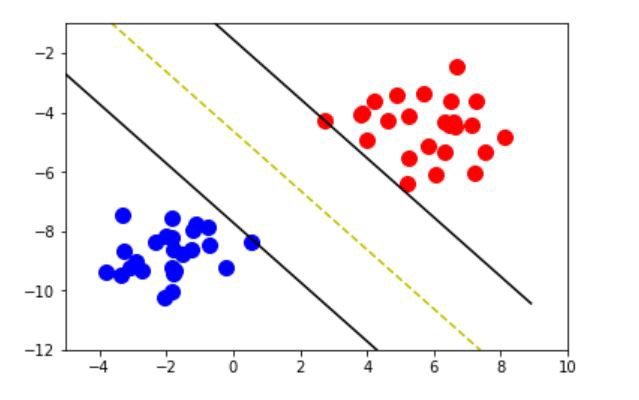

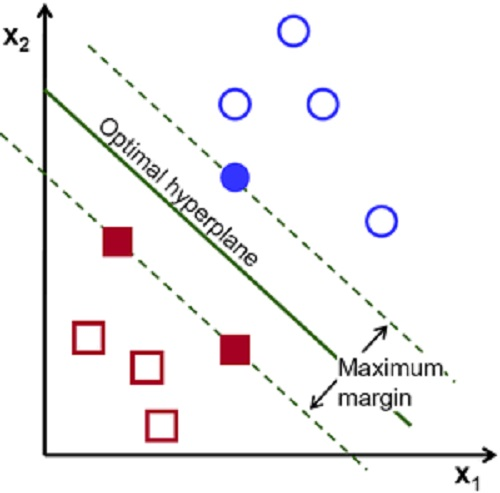

In [253]:
from sklearn.svm import SVC
accuracies = {}

In [254]:
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 88.52%


In [255]:
y_head_svm = svm.predict(x_test.T)

In [256]:
from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_test,y_head_svm)

<AxesSubplot:title={'center':'Support Vector Machine Confusion Matrix'}>

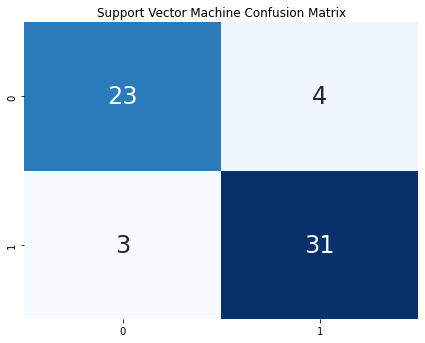

In [257]:
plt.figure(figsize=(24,12))
plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

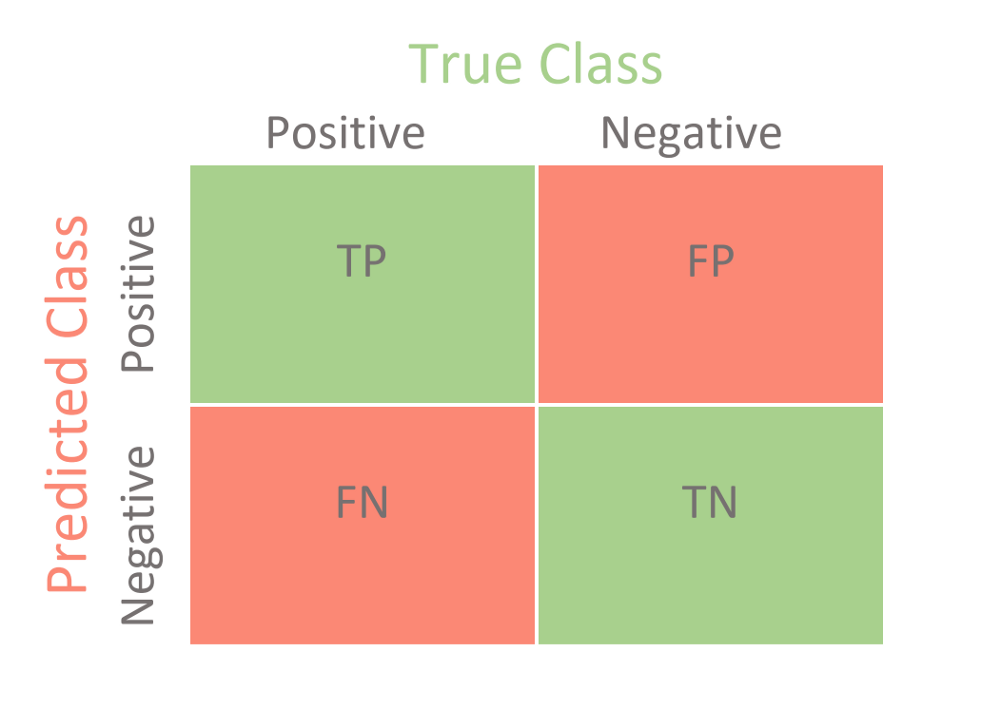

Our Work:

In [259]:
#This function takes as its argument the name of an excel file containing
#data organized such that each column is a sample, and the first row
#contains the sample labels and reads the data into X1 and X1 as well as
#returning the number of samples in each class and the number of features 

def readRealData(fileName, column_name):
    #X0=[];
    #X1=[];
    print('reading ',fileName )
    data=pd.read_csv(fileName);
    print(fileName,'has read ' )
    print(' ' )

    X0= data.loc[(data[column_name] == 0)]
    X1= data.loc[(data[column_name] == 1)]
    n0=X0.shape[0]
    n1=X1.shape[0]
    n=n0+n1
    p=X0.shape[1]
    return X0,X1,n0,n1,n,p

In [260]:
#X0= df.loc[(df['target'] == 0)]
#X1= df.loc[(df['target'] == 1)]

In [261]:
#n0=X0.shape[0]
#n1=X1.shape[0]
#n=n0+n1
#p=X0.shape[1]

# I have to merge X_train and y_train

# I have to merge x_test and y_test 

### I do this so that I can use the readData method on them instead of separating the data into two files

### For now.. I will split the data into two files

In [262]:
#training
fileName1='heart_train.csv';#3 labeled as 0, 5 labeled as 1, n0=658, n1=556, p=256

# fileName1='USPS train 7 and 9.xlsx';#7 labeled as 0, 9 labeled as 1, n0=645, n1=644, p=256
# fileName1='USPS train 5 and 8.xlsx';#5 labeled as 0, 8 labeled as 1, n0=556, n1=542, p=256
# fileName1='USPS train 1 and 7.xlsx';#1 labeled as 0, 7 labeled as 1, n0=1005, n1=645, p=256
#fileName1='mnist training 3 and 5.xlsx'
[X0,X1,n0,n1,n,p]=readRealData(fileName1, 'target');


reading  heart_train.csv
heart_train.csv has read 
 


In [265]:
#testing
fileName1='heart_test.csv';#3 labeled as 0, 5 labeled as 1, n0=658, n1=556, p=256

# fileName1='USPS train 7 and 9.xlsx';#7 labeled as 0, 9 labeled as 1, n0=645, n1=644, p=256
# fileName1='USPS train 5 and 8.xlsx';#5 labeled as 0, 8 labeled as 1, n0=556, n1=542, p=256
# fileName1='USPS train 1 and 7.xlsx';#1 labeled as 0, 7 labeled as 1, n0=1005, n1=645, p=256
#fileName1='mnist training 3 and 5.xlsx'
[X0_test,X1_test,_,_,_,_]=readRealData(fileName1, 'target');


reading  heart_test.csv
heart_test.csv has read 
 


In [266]:
## Train SVM on training data to determine weight vectors: tuned will optimize the penalty while untuned will have the default penalty of 1
muHat0=(np.sum(X0,axis=1)/n0).values.reshape(-1,1);
muHat1=(np.sum(X1,axis=1)/n1).values.reshape(-1,1);

In [267]:
X0.shape

(77, 14)

In [268]:
X0_test.shape

(61, 14)

In [269]:
77+61

138

In [270]:
X1.shape

(165, 14)

In [272]:
X1_test.shape

(0, 14)

In [287]:
n0

77

Until here, I am sure

In [288]:
n1

165

In [315]:
from sklearn import svm
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

C=[1e-4 ,1e-3 ,1e-2 ,1e-1 ,1e0 ,1e1 ,1e2 ,1e3];

errors_temp=np.zeros(len(C));
w_temp=np.zeros((p,len(C)));
w0_temp=np.zeros(len(C));

for k in tqdm(range(len(C))):
    SVMModel_temp=svm.SVC(C=C[k],kernel='linear')
    SVMModel_temp.fit(np.vstack((X0,X1)),np.vstack((np.zeros((n0,1)),np.ones((n1,1)))))

    w_temp[:,k]=SVMModel_temp.coef_;
    w0_temp[k]=SVMModel_temp.intercept_;

    y_pred_test=SVMModel_temp.predict(np.vstack((X0_test,X1_test)))
    errors_temp[k]=mean_squared_error(y_test,y_pred_test)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:06<00:00,  1.16it/s]


Done!

In [320]:
#tune to best C
warnings.filterwarnings("ignore")


minError_SVM=np.min(errors_temp);
index_SVMtuned=np.argmin(errors_temp);
minC=C[index_SVMtuned];

w_SVMtuned=w_temp[:,index_SVMtuned].reshape(-1,1);
w0_SVMtuned=w0_temp[index_SVMtuned];


#Use C with highest error

maxError_SVM=np.max(errors_temp);
index_SVMuntuned=np.argmax(errors_temp);
maxC=C[index_SVMuntuned];


w_SVMuntuned=w_temp[:,index_SVMuntuned].reshape(-1,1);
w0_SVMuntuned=w0_temp[index_SVMuntuned];

alpha=np.arange(-1,6+1e-2,1e-2);

error_alphaSVM_tuned=np.zeros(len(alpha));
error_alphaSVM_untuned=np.zeros(len(alpha));



Still needs work

In [329]:
muHat0.shape

(77, 1)

In [330]:
muHat1.shape

(165, 1)

not sure about that

In [340]:
shape = np.maximum(muHat0.shape, muHat1.shape)
muHat0 = np.zeros(shape)

In [341]:
muHat0[:muHat0.shape[0], :muHat0.shape[1]] = muHat0
muHat1 = np.zeros(shape)
muHat1[:muHat1.shape[0], :muHat1.shape[1]] = muHat1

In [342]:
muHat0.shape

(165, 1)

In [343]:
muHat1.shape

(165, 1)

In [344]:
def alphaSVM_classifier(alpha,w,w0,X0_test,X1_test,muHat0,muHat1):
    muHat=muHat1-muHat0;
    p=len(muHat);
    discrim0=np.zeros(len(X0_test.iloc[0,:])) #will hold computed discriminant for every test point actually in class 0 where each entry corresponds to a test point 
    discrim1=np.zeros(len(X1_test.iloc[0,:]))#same thing for class 1
    
    for i in range(len(X0_test.iloc[0,:])):
        discrim0[i]=(np.dot(w.T,muHat)/np.dot(muHat.T,muHat)*muHat.T+alpha*np.dot(w.T,(np.eye(p)-np.dot(muHat,muHat.T)/np.dot(muHat.T,muHat)))).dot(X0_test[:,i])+w0;

    
    for i in range(len(X1_test.iloc[0,:])):
        discrim1[i]=(np.dot(w.T,muHat)/np.dot(muHat.T,muHat)*muHat.T+alpha*np.dot(w.T,(np.eye(p)-np.dot(muHat,muHat.T)/np.dot(muHat.T,muHat)))).dot(X1_test[:,i])+w0;


    
    predictedLabels0=discrim0>0;
    predictedLabels1=discrim1>0;
    
    numErrors=np.sum(predictedLabels0)+np.sum(1-predictedLabels1);
    totalTest=X0_test.shape[1]+X1_test.shape[1];
    errorRate=numErrors/totalTest;
    return errorRate

In [345]:
for j in tqdm(range(len(alpha))):
    a=alpha[j];
    error_alphaSVM_tuned[j]=alphaSVM_classifier(a,w_SVMtuned,w0_SVMtuned,X0_test,X1_test,muHat0,muHat1);
    error_alphaSVM_untuned[j]=alphaSVM_classifier(a,w_SVMuntuned,w0_SVMuntuned,X0_test,X1_test,muHat0,muHat1);

  0%|                                                                                          | 0/701 [00:00<?, ?it/s]


IndexError: single positional indexer is out-of-bounds

In [ ]:
for j in tqdm(range(len(alpha))):
    a=alpha[j];
    error_alphaSVM_tuned[j]=alphaSVM_classifier(a,w_SVMtuned,w0_SVMtuned,X0_test,X1_test,muHat0,muHat1);
    error_alphaSVM_untuned[j]=alphaSVM_classifier(a,w_SVMuntuned,w0_SVMuntuned,X0_test,X1_test,muHat0,muHat1);


print(minError_SVM)
print(maxError_SVM)
plt.figure()
plt.plot(alpha,error_alphaSVM_untuned)
plt.xlabel(r'$\alpha$')
plt.ylabel('Error estimate')